# Data exploration - Expedia Kaggle challenge

In [20]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Read the Data
train = pd.read_csv("./train.csv")
#train = train.drop(['id'],axis=1)
test = pd.read_csv("./test.csv")
#test = test.drop(['id'],axis=1)
#target = train.target
#featureNames = train.columns.values
feat_names = test.columns.values

dest = pd.read_csv("./destinations.csv")

['date_time' 'site_name' 'posa_continent' 'user_location_country'
 'user_location_region' 'user_location_city' 'orig_destination_distance'
 'user_id' 'is_mobile' 'is_package' 'channel' 'srch_ci' 'srch_co'
 'srch_adults_cnt' 'srch_children_cnt' 'srch_rm_cnt' 'srch_destination_id'
 'srch_destination_type_id' 'is_booking' 'cnt' 'hotel_continent'
 'hotel_country' 'hotel_market' 'hotel_cluster']
[ 1 80 21 92 41 69 70 98 10 18 28 25  2 16 94 77 24 58 36 82 46 30 29 57 85
  5 59 62 81  6 53  8 73 26 95 13 42  9 55 91 72 65 56 68 75 38 67 78 43 37
 99 35 20 90 50 22 64 60 11 97 89 83 14 51 15 40 45 84 54 76 17 49 32  7 88
 79  4 39 47 19 33 48 93  0 34 63 96 44  3 12 86 71 61 66 52 87 31 27 23 74]


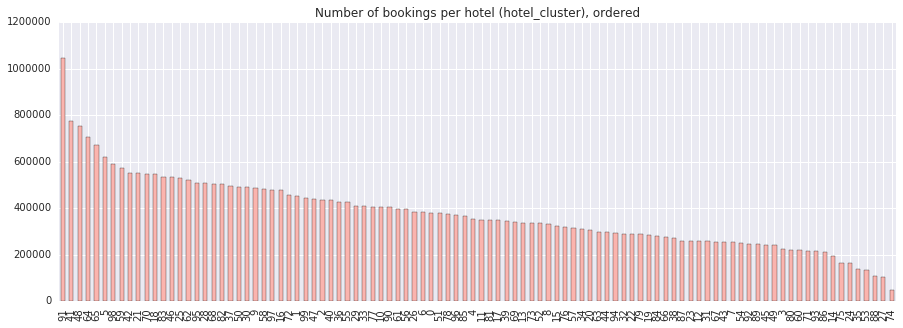

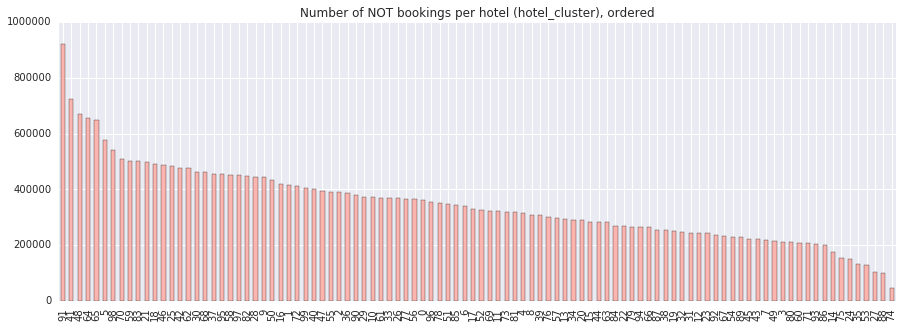

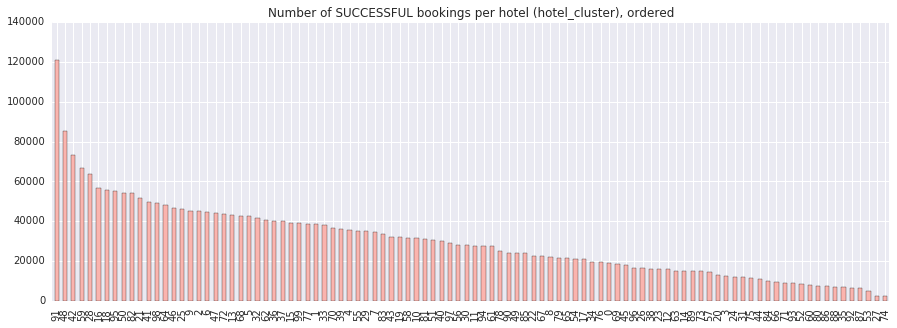

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [29]:
print(train.columns.values)
print(train.hotel_cluster.unique())
#plt.bar(range(len(train["hotel_cluster"].value_counts().get_values())), train["hotel_cluster"].value_counts().get_values() )
train["hotel_cluster"].value_counts().plot(kind='bar',colormap="Pastel1",figsize=(15,5))
plt.title("Number of bookings per hotel (hotel_cluster), ordered")
plt.show()
train[train["is_booking"] == 0]["hotel_cluster"].value_counts().plot(kind='bar',colormap="Pastel1",figsize=(15,5))
plt.title("Number of NOT bookings per hotel (hotel_cluster), ordered")
plt.show()
train[train["is_booking"] == 1]["hotel_cluster"].value_counts().plot(kind='bar',colormap="Pastel1",figsize=(15,5))
plt.title("Number of SUCCESSFUL bookings per hotel (hotel_cluster), ordered")
plt.show()
train.head()

In [8]:
bookings = train[train["is_booking"] == 1]

print("Where most bookings come from:")
print(bookings['user_location_country'].value_counts().head(10))
#print(bookings.sort_values(by=['user_location_country']).head())
print("Where most bookings go to:")
print(bookings['hotel_country'].value_counts().head(10))
#print(bookings.sort_values(by=['hotel_country']).head())

Where most bookings come from:
66     1675105
205     345625
69      158944
3       138103
46       67071
77       62543
1        52266
215      45526
133      30537
23       21676
Name: user_location_country, dtype: int64
Where most bookings go to:
50     1616055
198     197228
70      102651
105      93326
8        80990
204      71709
77       60720
144      60504
106      45909
182      44362
Name: hotel_country, dtype: int64


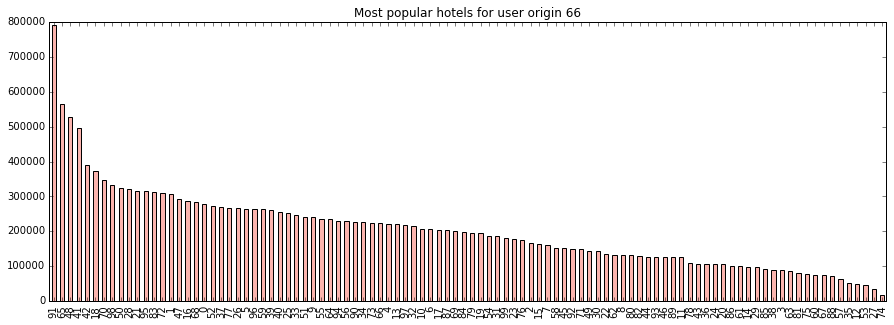

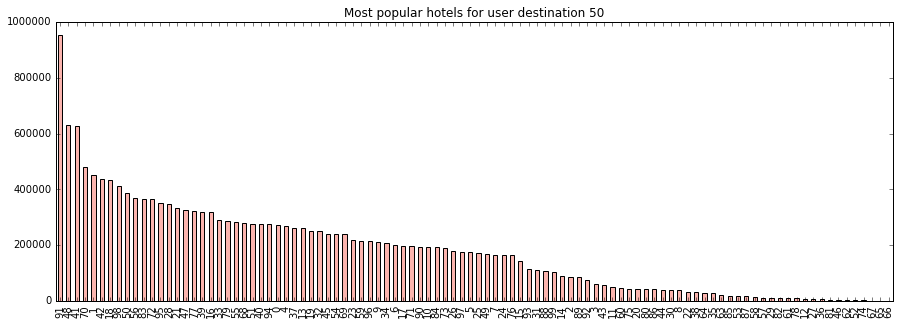

In [13]:
user_country_id = 66

# Select the hotel_clusters by user_location_country
customer_clusters = train[train["user_location_country"] == user_country_id]["hotel_cluster"]
# Plot them in order of count
customer_clusters.value_counts().plot(kind='bar',colormap="Pastel1",figsize=(15,5))
plt.title("Most popular hotels for user origin {0}".format(user_country_id))
plt.show()

country_id = 50
# Select the hotel_clusters by hotel_country
country_clusters = train[train["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Pastel1",figsize=(15,5))
plt.title("Most popular hotels for user destination {0}".format(country_id))
plt.show()

In [14]:
train_num = train.select_dtypes(exclude=[object])
train_num_feat = train_num.columns

train_corr = train_num.corr()

Top 10 correlations:
site_name                  posa_continent               0.634817
posa_continent             site_name                    0.634817
srch_rm_cnt                srch_adults_cnt              0.511984
srch_adults_cnt            srch_rm_cnt                  0.511984
srch_destination_id        srch_destination_type_id     0.437665
srch_destination_type_id   srch_destination_id          0.437665
hotel_continent            orig_destination_distance    0.414828
orig_destination_distance  hotel_continent              0.414828
hotel_continent            posa_continent               0.333605
posa_continent             hotel_continent              0.333605
hotel_continent            hotel_country                0.298872
hotel_country              hotel_continent              0.298872
                           site_name                    0.261031
site_name                  hotel_country                0.261031
orig_destination_distance  hotel_country                0.254987
hote

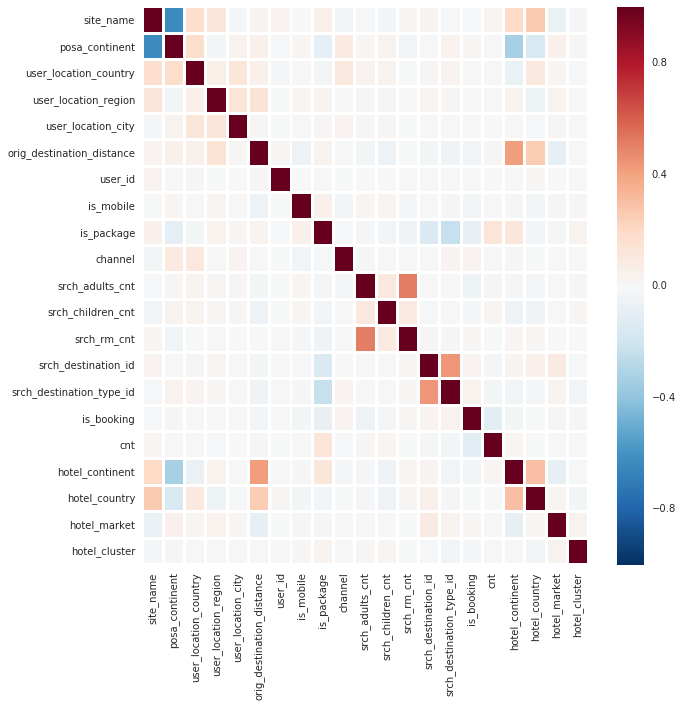

In [27]:
fig, (axis1) = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(train_corr,linewidths=2)

print('Top 10 correlations:')
# Note that the first entries from this sort are all correlations of 
# variables against themselves... we ignore them. Also note that each entry is doubled...
# AND note that this is looking at absolute values of correlation...
print(train_corr.stack().abs().sort_values(ascending=False)[len(train_num_feat):len(train_num_feat)+20])

Some of the highest correlations make sense - of course search room count is correlated with search adult count. An interesting thought comes to mind: bookings say with more adults than rooms would likely go to cheaper, or at least a certain class of, hotels
